In [6]:
import pandas as pd

In [7]:
data=pd.read_csv('DataSet.csv')

In [8]:
data['generated'].value_counts()

generated
1.0    35291
0.0    20364
Name: count, dtype: int64

In [9]:
data

,text,generated,Text_length,n_sentences,n_1pov,Unique_words,Unique_Per_Size,sent_per_text,1pov_per_size,n_ubigrams,...,Text_length_cleaned,unique_trigram_cleaned_count,unique_trigram_cleaned_ratio,unique_bigram_cleaned_count,unique_bigram_cleaned_ratio,unique_4gram_count,unique_4gram_ratio,unique_4gram_clean_count,unique_4gram_clean_ratio,sentence_lengths_std
0,"In my opinion, I think driverless cars would b...",0.0,400,22,8,199,0.497500,0.055000,0.020000,362,...,185,180,0.972973,169,0.913514,390,0.975000,180,0.972973,7.055857
1,"Dear Senator,\n\nThe Electoral College has wor...",0.0,424,20,4,168,0.396226,0.047170,0.009434,312,...,181,158,0.872928,142,0.784530,359,0.846698,158,0.872928,12.167991
2,Dear TEACHER_NAME\n\nWe teens need to take a b...,0.0,216,7,9,114,0.527778,0.032407,0.041667,195,...,94,92,0.978723,89,0.946809,212,0.981481,92,0.978723,16.779482
3,"The author of ""The Challenge of Exploring Venu...",1.0,473,20,1,169,0.357294,0.042283,0.002114,328,...,248,209,0.842742,188,0.758065,383,0.809725,209,0.842742,6.574762
4,"As an eighth-grade student, it is crucial to u...",1.0,459,20,8,134,0.291939,0.043573,0.017429,259,...,201,153,0.761194,132,0.656716,299,0.651416,153,0.761194,6.320403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55650,Cars arent bad....or are they? I feel like the...,1.0,371,26,4,132,0.355795,0.070081,0.010782,255,...,154,133,0.863636,124,0.805195,298,0.803235,133,0.863636,5.958560
55651,Have you ever dream of a future where cars are...,0.0,532,30,21,224,0.421053,0.056391,0.039474,457,...,236,232,0.983051,218,0.923729,507,0.953008,232,0.983051,7.004443
55652,Subtitle: A Game-Changing Merger Aims to Revol...,1.0,683,23,0,329,0.481698,0.033675,0.000000,595,...,372,359,0.965054,345,0.927419,645,0.944363,359,0.965054,11.468046
55653,Every school is a different and different plac...,1.0,470,16,15,162,0.344681,0.034043,0.031915,400,...,203,199,0.980296,183,0.901478,454,0.965957,199,0.980296,12.603943


In [10]:
data.columns

Index(['text', 'generated', 'Text_length', 'n_sentences', 'n_1pov',
       'Unique_words', 'Unique_Per_Size', 'sent_per_text', '1pov_per_size',
       'n_ubigrams', 'n_ubigrams_per_size', 'stopwords', 'stop_ratio',
       'entity_counts', 'person_counts', 'person_ratio', 'brunets_index',
       'entity_dictionary', 'org_count', 'loc_count', 'date_count',
       'time_count', 'quantity_count', 'cardinal_count', 'money_count',
       'percent_count', 'health_count', 'product_count', 'event_count',
       'law_count', 'nationality_count', 'title_count', 'avg_word_length',
       'pos_tag_dict', 'flesch_reading_ease', 'ari_score', 'cli_score',
       'smog_score', 'clean_text', 'org_count_ratio', 'loc_count_ratio',
       'date_count_ratio', 'time_count_ratio', 'quantity_count_ratio',
       'cardinal_count_ratio', 'money_count_ratio', 'percent_count_ratio',
       'health_count_ratio', 'product_count_ratio', 'event_count_ratio',
       'law_count_ratio', 'nationality_count_ratio', 'title_

In [10]:

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assume you have a dataset X containing features and y containing labels
# X should be a 2D array where each row represents a sample and each column represents a feature
# y should be a 1D array containing the corresponding labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['Unnamed: 0','generated','text','entity_counts','entity_dictionary','sent_per_text','pos_tag_dict']),data['generated'], test_size=0.2)

# Initialize the logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.740298239310097


C:\Users\Hamda\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report



X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['generated','text','entity_counts','entity_dictionary','sent_per_text','pos_tag_dict','pos_tag_dict','clean_text']),data['generated'], test_size=0.2)

rf_classifier = RandomForestClassifier(n_estimators=150, random_state=89)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))


Accuracy: 0.8769203126403737
              precision    recall  f1-score   support

         0.0       0.81      0.86      0.84      4055
         1.0       0.92      0.88      0.90      7076

    accuracy                           0.88     11131
   macro avg       0.86      0.87      0.87     11131
weighted avg       0.88      0.88      0.88     11131



In [16]:
import numpy as np

from sklearn.metrics import precision_score, recall_score, f1_score
import random

y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print("Test Precision:", precision)
print("Test Recall:", recall)
print("Test F1 Score:", f1)

Test Precision: 0.9188197298884322
Test Recall: 0.8845392877331826
Test F1 Score: 0.9013536866359447


# Neural Network

In [42]:
columns_to_exclude = ['entity_counts','entity_dictionary','pos_tag_dict']
subset_columns = [col for col in data.columns if col not in columns_to_exclude]
data = data[subset_columns]


In [43]:
numeric_count = sum(data[col].dtype in [int, float] for col in data.columns)
non_numeric_count = len(data.columns) - numeric_count

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt

# Load your pandas dataset
# For this example, I'll create a random DataFrame with 90 columns
# You should replace this with your actual dataset
shuffled_data = data.sample(frac=1).reset_index(drop=True)

# Select columns for input features (X) and target (y)
X = shuffled_data.drop(columns=['generated','text','clean_text']) # Input features
y = shuffled_data['generated']  # Target variable

# Define the model
model = Sequential([
    Dense(20, activation='relu', input_shape=(len(X.columns),)),
    Dense(30, activation='relu'),
    Dense(30, activation='relu'),

    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define callbacks for model checkpointing and early stopping
checkpoint = ModelCheckpoint("best_model.h5", monitor='val_loss', verbose=1, save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

# Train the model with callbacks
history = model.fit(X, y, epochs=10, batch_size=64, validation_split=0.2, callbacks=[checkpoint, early_stopping])

# Load the best model weights saved during training
best_model = tf.keras.models.load_model("best_model.h5")

# Evaluate the best model on the testing set
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Plot training history
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


Epoch 1/10
670/696 [===========================>..] - ETA: 0s - loss: 0.7751 - accuracy: 0.7133
Epoch 00001: val_loss improved from inf to 0.52278, saving model to best_model.h5
696/696 [==============================] - 1s 2ms/step - loss: 0.7663 - accuracy: 0.7143 - val_loss: 0.5228 - val_accuracy: 0.7265
Epoch 2/10
670/696 [===========================>..] - ETA: 0s - loss: 0.5099 - accuracy: 0.7520
Epoch 00002: val_loss improved from 0.52278 to 0.46714, saving model to best_model.h5
696/696 [==============================] - 1s 2ms/step - loss: 0.5083 - accuracy: 0.7526 - val_loss: 0.4671 - val_accuracy: 0.7697
Epoch 3/10
685/696 [============================>.] - ETA: 0s - loss: 0.4841 - accuracy: 0.7663
Epoch 00003: val_loss improved from 0.46714 to 0.45613, saving model to best_model.h5
696/696 [==============================] - 1s 2ms/step - loss: 0.4844 - accuracy: 0.7665 - val_loss: 0.4561 - val_accuracy: 0.7796
Epoch 4/10
439/696 [=================>............] - ETA: 0s - l

Epoch 1/20
667/696 [===========================>..] - ETA: 0s - loss: 0.7790 - accuracy: 0.7275
Epoch 00001: val_loss improved from inf to 0.43564, saving model to best_model.h5
696/696 [==============================] - 1s 2ms/step - loss: 0.7681 - accuracy: 0.7288 - val_loss: 0.4356 - val_accuracy: 0.7989
Epoch 2/20
684/696 [============================>.] - ETA: 0s - loss: 0.4090 - accuracy: 0.8027
Epoch 00002: val_loss improved from 0.43564 to 0.40671, saving model to best_model.h5
696/696 [==============================] - 1s 2ms/step - loss: 0.4080 - accuracy: 0.8034 - val_loss: 0.4067 - val_accuracy: 0.8038
Epoch 3/20
668/696 [===========================>..] - ETA: 0s - loss: 0.3682 - accuracy: 0.8256
Epoch 00003: val_loss improved from 0.40671 to 0.38487, saving model to best_model.h5
696/696 [==============================] - 1s 2ms/step - loss: 0.3670 - accuracy: 0.8260 - val_loss: 0.3849 - val_accuracy: 0.8290
Epoch 4/20
690/696 [============================>.] - ETA: 0s - l

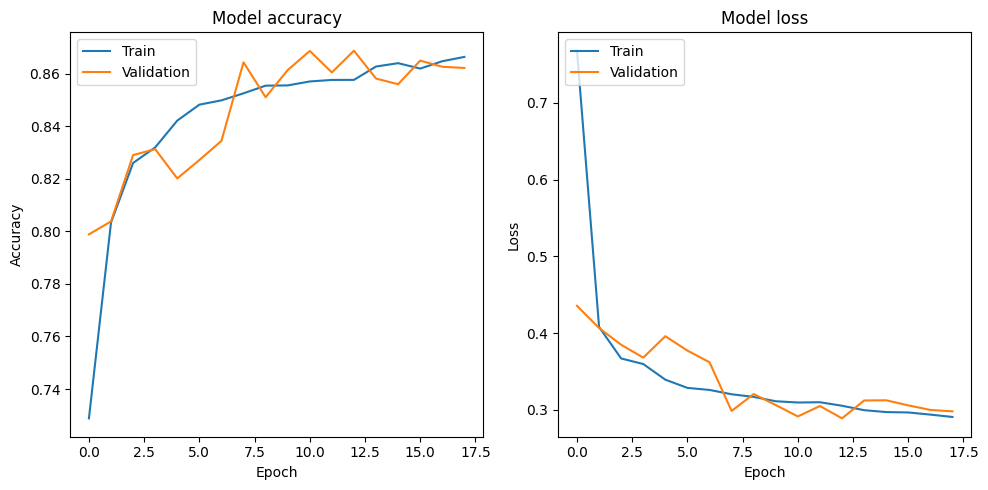

In [46]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt

# Load your pandas dataset
# For this example, I'll create a random DataFrame with 90 columns
# You should replace this with your actual dataset
shuffled_data = data.sample(frac=1).reset_index(drop=True)

# Select columns for input features (X) and target (y)
X = shuffled_data.drop(columns=['generated','text','clean_text']) # Input features
y = shuffled_data['generated']  # Target variable

# Define the model
model = Sequential([
    Dense(150, activation='relu', input_shape=(len(X.columns),)),
    Dense(160, activation='relu'),
    Dense(140, activation='relu'),
    Dense(135, activation='relu'),

    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define callbacks for model checkpointing and early stopping
checkpoint = ModelCheckpoint("best_model.h5", monitor='val_loss', verbose=1, save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

# Train the model with callbacks
history = model.fit(X, y, epochs=20, batch_size=64, validation_split=0.2, callbacks=[checkpoint, early_stopping])

# Load the best model weights saved during training
best_model = tf.keras.models.load_model("best_model.h5")

# Evaluate the best model on the testing set
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Plot training history
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()
